# Periodic stimuli (waves, gratings, grids,...)
```{tip}
This guide explains the principles behind, behavior of, and relations between
the parameters of periodic stimuli in `stimupy`.
For a more hands-on demonstration of how those parameters affect a specific stimulus,
see, e.g., [](../../reference/demos/stimuli/waves.md)
```

Many commonly used visual stimuli are some sort of periodic stimulus:
sinewaves gratings are the most obvious example,
but also checkerboards, grids, sets of rings, and pinwheels can be considered periodic.
`stimupy` includes many of these as stimuli and constructs them as periodic,
which has some particular advantages.
The simplest variants can be found in {py:mod}`stimupy.stimuli.waves`

In [1]:
from stimupy.stimuli import waves

from stimupy.utils import plot_stimuli

## Interdependence of parameters
Periodic stimuli (e.g., `waves`)
consist of repetitions of some _elements_ or _phases_.
In a sinewave grating, these are the light and dark phases.
in a squarewave grating, those same phases visually appears as white and black `bars`:

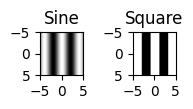

In [2]:
sinewave = waves.sine_linear(visual_size=(10, 10), ppd=10, n_bars=5)
squarewave = waves.square_linear(visual_size=(10, 10), ppd=10, n_bars=5)

plot_stimuli({'Sine': sinewave, 'Square': squarewave})

There is regularity to periodic stimuli (what makes the periodic),
namely that there are repeated _cycles_ (here of 2 phases/elements per cycle),
where each cycle is identical to each other cycle.
This regularity can be expressed in several different ways,
with several different parameters 
-- and these parameters have some interdependence on each other.

```{tip}
In the examples in this section,
the code for the `sinewave` will remain the same across examples,
the code for the `squarewave` will demonstrate the different parameterization
(keeping the output images the same)
```

### Frequency $\sim$ number of elements
The number of elements can also be expressed a _spatial frequency_:
here we have $5$ bars, which corresponds to $5/2 = 2.5$ _cycles_ of light-dark.
$2.5$ cycles, in $10$ degrees of visual angle,
is $2.5/10 = .25$ cycles per degree  of visual angle (_cpd_).

In some cases, you may want to conceptualize your stimulus in terms of this `frequency`,
in other cases you may want to conceptualize your stimulus in terms of the `n_bars`.
`stimupy` allows you to do either:

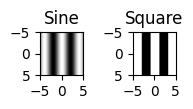

In [3]:
sinewave = waves.sine_linear(visual_size=(10, 10), ppd=10, n_bars=5)
squarewave = waves.square_linear(visual_size=(10, 10), ppd=10, frequency=.25)

plot_stimuli({'Sine': sinewave, 'Square': squarewave})

### Phase width vs. visual size
To specify a periodic stimulus like these waves, a third parameter at play is
the `phase_width`, i.e., the size of each element (in this case: `bar_width`).
So far, we have specified the overall `visual_size` of the stimulus (e.g., `(10, 10)`).
To draw `n_bars=5` ($=$ `frequency=.25`) in $10$ degrees,
each bar (/ phase) has `bar_width` of $2$ degrees of visual of angle.

Sometimes, you may care more about specifying this size of each element,
rather than the total visual size of the stimulus (which is then resolved automatically)
`stimupy` allows you to do either:

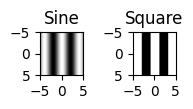

In [4]:
sinewave = waves.sine_linear(visual_size=(10, 10), ppd=10, n_bars=5)
squarewave = waves.square_linear(visual_size=None, ppd=10, n_bars=5, bar_width=2)

plot_stimuli({'Sine': sinewave, 'Square': squarewave})

### Phase width vs. number of elements / frequency
Since only a certain number of elements with given width can be drawn
in a given total size,
this means that if we specify both `visual_size` and `bar_width`,
the number of bars is also determined:

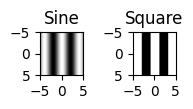

In [5]:
sinewave = waves.sine_linear(visual_size=(10, 10), ppd=10, n_bars=5)
squarewave = waves.square_linear(visual_size=(10, 10), ppd=10, bar_width=2)

plot_stimuli({'Sine': sinewave, 'Square': squarewave})

### Periodicity & resolution
In general, to specify these periodic signals in a way that can be drawn,
there are $7$ relevant/possible parameters:
- resolution parameters `visual_size`, `ppd`, `shape`
- periodicity parameters `visual_size`, `frequency`, `bar_width`, `n_bars`

The relations are such that:
- $2$ out of $3$ resolution parameters are required to resolve
- `frequency` (in cpd) and `bar_width` (in degrees per phase) are perfectly related:
  `frequency = 1/(bar_width*2)`
- $2$ out of $4$ periodicity parameters are required to resolve

Since `visual_size` is _both_ a resolution and a periodicity parameter,
it can be resolved from one set and used for the other.
Thus, a specification of, e.g. `ppd`, `n_bars` and `bar_width` is enough:

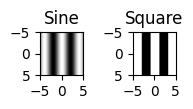

In [6]:
sinewave = waves.sine_linear(visual_size=(10, 10), ppd=10, n_bars=5)
squarewave = waves.square_linear(ppd=10, n_bars=5, bar_width=2)

plot_stimuli({'Sine': sinewave, 'Square': squarewave})

## Even, odd or integer number of elements
Particularly for gratings, the requirements on the number of elements can be very different depending on the use-case.
In some cases, you may want to ensure that your grating has an integer number of phases,
e.g., if you want to avoid partial bars in a squarewave grating.
For other stimuli, you may be fine with an "incomplete" phase at the end, e.g. if your sinewave grating consists of 7.1 cycles.
In yet other situations, you may want to be even more specific and may want to make sure that you have an _even_ number of phases in your grating,
(i.e. a full number of _periods_, as many bright as dark bars),
or an _odd_ number of phases.
The `period` argument controls this behavior
when `stimupy` resolves the periodicity for you.
it can be `"even"`, `"odd"`, `"either"` (ensures only complete phases), or `"ignore"`:

/home/joris/Research/stimupy/stimupy/components/waves.py:170: UserWarning: Adjusted phase_width=2.5 -> 2.0 because of period=odd
  warnings.warn(


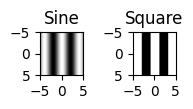

In [7]:
sinewave = waves.sine_linear(visual_size=(10, 10), ppd=10, n_bars=5)

# Resolve to "odd" number of phases
squarewave = waves.square_linear(visual_size=(10, 10), ppd=10, bar_width=2.5, period="odd")

plot_stimuli({'Sine': sinewave, 'Square': squarewave})

## Poor resolution, bad sampling
Not all `n_phases`/`frequency`s are (equally) possible in a given image `shape`.
Specifically not all _`phase_widths`_ are possible for a given `ppd`.
if there $10$ pixels per degree of visual angle,
that each pixel increase means an increase of $1/10$ degrees of visual angle.
Thus, at $ppd=5$, the width of a, e.g., a bar can only change in $1/10$ degree intervals
-- meaning the `phase_width` can be $2, 2.1, 2.2$ degrees, but not $2.12$ degrees.

````{margin}
```{note}
This is the same problem as _sampling_ in digital signal processing,
where a given frequency cannot be displayed/analyzed properly 
for a given sampling rate ($\sim$ ppd)
```
````

If desired (i.e. if _`round_phase_width=True`_), `stimupy` supports the user in cases where the given parameter values
result in a poor periodicity $\times$ resolution combination.
Specifically, it will adjust/round the _periodicity_ parameters to try and accomplish
the closest possible version of the stimulus, and warn you about this change.
Which way it rounds to, can be determined by the `period` argument:

/home/joris/Research/stimupy/stimupy/components/waves.py:170: UserWarning: Adjusted phase_width=2.12 -> 2.0 because of period=either
  warnings.warn(


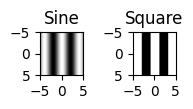

In [8]:
sinewave = waves.sine_linear(visual_size=(10, 10), ppd=10, n_bars=5)

# Poor resolution:
squarewave = waves.square_linear(visual_size=(10, 10), ppd=10, bar_width=2.12, period="either")

plot_stimuli({'Sine': sinewave, 'Square': squarewave})

In fact, it will adjust whichever parameter was/were passed in:

/home/joris/Research/stimupy/stimupy/components/waves.py:176: UserWarning: Adjusted frequency=0.26 -> 0.25 because of period=either
  warnings.warn(


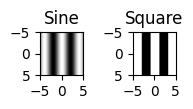

In [9]:
sinewave = waves.sine_linear(visual_size=(10, 10), ppd=10, n_bars=5)

# Poor frequency:
squarewave = waves.square_linear(visual_size=(10, 10), ppd=10, frequency=.26, period="either")

plot_stimuli({'Sine': sinewave, 'Square': squarewave})

## Periodic in other orientations, distance metrics
So far, you have seen _linear_ periodic stimuli, specifically horizontal gratings.
We can rotate these, using the `rotation` parameter:

/home/joris/Research/stimupy/stimupy/components/waves.py:348: UserWarning: Rounding phase width is turned off for oblique gratings
  warnings.warn("Rounding phase width is turned off for oblique gratings")


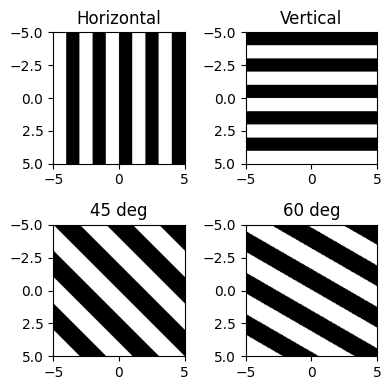

In [10]:
horizontal = waves.square_linear(visual_size=(10, 10), ppd=20, n_bars=10)
vertical = waves.square_linear(visual_size=(10, 10), ppd=20, n_bars=10, rotation=90)
oblique1 = waves.square_linear(visual_size=(10, 10), ppd=20, n_bars=10, rotation=45)
oblique2 = waves.square_linear(visual_size=(10, 10), ppd=20, n_bars=10, rotation=60)


plot_stimuli({'Horizontal': horizontal,
              'Vertical': vertical,
              '45 deg': oblique1,
              '60 deg': oblique2,
              })

As `stimupy` warns: the rounding of `phase_width` to fit nicely in `ppd`
is not possible for oblique gratings.
This has to do with the `ppd` being defined horizontal/vertical,
while the grating is defined obliquely,
and thus cannot fall neatly in pixels anyway.

Other periodic stimuli ({py:mod}`stimupy.stimuli.waves`)
are analogous in the parameterization,
but are evaluated over different [_`distance_metrics`_](../dimensions.md).
Additionally, the naming schema of the arguments is adjusted
to better fit the geometry of the distance metric.
Particularly the name for each `phase` is different:

- for `linear` waves: `bar`
- for `radial` waves: `ring`
- for `rectilinear` waves: `frame`
- for `angular` waves: `segment`

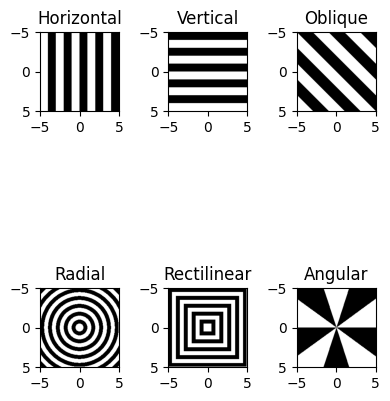

In [11]:
horizontal = waves.square_linear(visual_size=(10, 10), ppd=20, n_bars=10)
vertical = waves.square_linear(visual_size=(10, 10), ppd=20, n_bars=10, rotation=90)
oblique = waves.square_linear(visual_size=(10, 10), ppd=20, n_bars=10, rotation=45)
radial = waves.square_radial(visual_size=(10, 10), ppd=20, n_rings=10)
rectilinear = waves.square_rectilinear(visual_size=(10, 10), ppd=20, n_frames=10)
angular = waves.square_angular(visual_size=(10, 10), ppd=20, n_segments=10)

plot_stimuli({'Horizontal': horizontal,
              'Vertical': vertical,
              'Oblique': oblique,
              'Radial': radial,
              'Rectilinear': rectilinear,
              'Angular': angular})

```{warning}
The `angular` stimuli have a unique property
that the distance over which periodicity generated,
is fixed at $[0, 360]$ angular degrees.
As a result, the `frequency` argument for these stimuli
is interpreted as _cycles per image_ (rather than _cpd_).
Thus, it is exactly `n_segments/2`, always.
```

## Derived stimuli
These parameters for periodic stimuli are also
part of the specification of stimuli that use or are derived from these.
{py:mod}`Gabors <stimupy.stimuli.gabors>` are a straightforward example:
it uses all the same {py:func}`waves.sine <stimupy.stimuli.waves.sine_linear>` parameters:

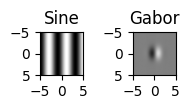

In [12]:
from stimupy.stimuli import gabors

sinewave = waves.sine_linear(visual_size=(10, 10), ppd=10,
                             n_bars=5,
                             intensities=(0.0, 1.0),
                             origin='center')

gabor = gabors.gabor(visual_size=(10, 10), ppd=10,
                     n_bars=5,
                     intensities=(0.0, 1.0),
                     origin='center',

                     sigma=1)

plot_stimuli({'Sine': sinewave, 'Gabor': gabor})

{py:mod}`White's illusions <stimupy.stimuli.whites>` are another example:
a squarewave grating, with several target-regions embedded in them.
There are lots of variations on this stimulus,
-- some of which are implemented in `stimupy` --
but fundamentally all build on some squarewave grating
which takes the usual {py:mod}`waves <stimupy.stimuli.waves>`-params.

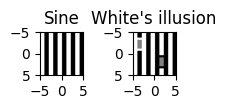

In [13]:
from stimupy.stimuli import whites

sinewave = waves.square_linear(visual_size=(10, 10), ppd=10,
                             n_bars=10,
                             origin="corner",
                             intensity_bars=(0.0, 1.0))

whites = whites.yazdanbakhsh(visual_size=(10, 10), ppd=10,
                             n_bars=10,
                             intensity_bars=(0.0, 1.0),

                             target_indices_top=2,
                             target_indices_bottom=-3,
                             target_heights=2,
                             target_center_offset=2,
                             gap_size=.5)

plot_stimuli({'Sine': sinewave, "White's illusion": whites})

% ## CHECKERBOARDS, GRIDS